In [1]:

import operator
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

from sklearn.model_selection import train_test_split
import mglearn

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy import stats #기술통계 전반적인 통계정보를 알려주는 객체
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

import statsmodels.api as sm #결과 요약 해주는거

# 성능측정하기

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
cols_to_keep = ["Survived","Age","Fare"]

In [12]:
dummy_class=pd.get_dummies(df["Pclass"],prefix="Pclass")
dummy_class

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [10]:
dummy_sex = pd.get_dummies(df["Sex"],prefix="Sex")
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
df1=df[cols_to_keep].join(dummy_class.loc[:,"Pclass1":]) #dummy의 모든행 Pclass1부터 모든열
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [15]:
df2=df[cols_to_keep].join(dummy_class)
df2.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [16]:
df1 = df1.join(dummy_sex.loc[:,"Sex_male"])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [17]:
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [18]:
df1[train_cols]

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,22.0,7.2500,0,0,1,1
1,38.0,71.2833,1,0,0,0
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,0,0
4,35.0,8.0500,0,0,1,1
...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,1
887,19.0,30.0000,1,0,0,0
888,NaN,23.4500,0,0,1,0
889,26.0,30.0000,1,0,0,1


# 결측치 확인하기

In [19]:
np.isnan(df1[train_cols])


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,True,False,False,False,False,False
889,False,False,False,False,False,False


In [20]:
#결측치 삭제
# df1[train_cols] = df1[train_cols].dropna(axis =0) #열기준 삭제
# df1["Survived"] = df1["Survived"].dropna(axis =0)

#0으로 대체
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

In [21]:
import statsmodels.api as sm
model = sm.Logit(df1["Survived"],df1[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


## fare를 제외하고 P value값이 0.05? 된다
coef에 주목한다. gre:0.0023 gpa :0.840, prestige_2 : -0.6754 등등...
coef(편회귀계수)의 값이 양수이면 그 컬럼의 값이 커질수록 목적변수가 TRUE일 확률 즉, admit=1일 확률이 높아진다.
반대로 coef의 값이 음수이면 그 컬럼의 값이 커질수록 목적변수가 FALSE일 확률 즉, admin=0일 확률이 높아진다.

즉 GRE나 GPA가 커질수록 대학원에 입학할 확률은 커지고 prestige_2, prestige_3이 커질수록 대학원에 입학할 확률은 작아진다. 
이러한 경향은 pretige가 낮아질수록 심해진다.


출처: https://3months.tistory.com/27 [Deep Play]

In [22]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2020-06-24 10:45 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [23]:
model2 = LogisticRegression().fit(df1[train_cols],df1["Survived"])

In [25]:
df1["predict"] = model2.predict(df1[train_cols])
df1.head(5)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0


In [26]:
confusion_matrix(df1["Survived"],df1["predict"])

array([[456,  93],
       [100, 242]], dtype=int64)

In [31]:
print("정확도 : ", model2.score(df1[train_cols], df1["Survived"]))
print("정확도: ", (698)/891) # 모두 더한것이 분모 분자는 맞춘거 0,0 이랑 1,1 합친게 분자로

정확도 :  0.7833894500561167
정확도:  0.7833894500561167


In [30]:
193/891

0.2166105499438833

In [32]:
print(classification_report(df1["Survived"],df1["predict"]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate(Recall)')

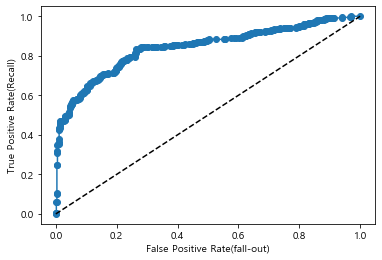

In [33]:
fpr, tpr, thresholds = roc_curve(df1['Survived'], model2.decision_function(df1[train_cols]))

plt.plot(fpr, tpr, 'o-', label = 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate(fall-out)')
plt.ylabel('True Positive Rate(Recall)')

### 사례 : Cancer
- 좋은 성능을 재기 위한 방법에 대한 관점

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [35]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
data["class"] = pd.Series(cancer.target, dtype = "category")
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [37]:
X = data.loc[:,"mean radius":"worst fractal dimension"]
y = data["class"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 0)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [39]:
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.05e-153
Time:                        11:36:42   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
from sklearn import metrics
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))

정확도 :  0.951048951048951


In [45]:
cnt = metrics.confusion_metrix(y_test, y_pred)
cnt

AttributeError: module 'sklearn.metrics' has no attribute 'confusion_metrix'

In [46]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[52,  1],
       [ 6, 84]], dtype=int64)

In [48]:
# pvalue가 0.05보다 작은 feature들만 선별
X=data[["mean compactness","smoothness error","concavity error","worst radius","worst area" ]]
y = data["class"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 0)


In [51]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [53]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.37e-137
Time:                        11:52:26   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

In [54]:
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))

정확도 :  0.916083916083916


In [55]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[47,  6],
       [ 6, 84]], dtype=int64)

In [56]:
# pvalue가 0.05보다 큰 feature 선별
X = data[["mean texture", "mean smoothness", "mean fractal dimension", 
          "mean symmetry", "texture error"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 0)
log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           3.39e-66
Time:                        11:57:04   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

In [57]:
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))

정확도 :  0.7202797202797203
